# 教育の地域間格差の分析

公立小学校のまとめ（1シート目）を取り込みます。１９９６年から2016年までの2年毎のデータを用いています。

In [3]:
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'AppleGothic' #macの文字化け対策

input_book = pd.ExcelFile('final_report.xlsx')
input_sheet_name = input_book.sheet_names

df_ps = input_book.parse(input_sheet_name[0])
df_ps

,scale,total,education,school_lunch,activity
0,指定都市・特別区,409694,55090,44542,310062
1,指定都市・特別区,407152,56534,43792,306826
2,指定都市・特別区,349332,49289,39820,260223
3,指定都市・特別区,361160,52623,43574,264963
4,指定都市・特別区,363634,53162,40106,270366
5,指定都市・特別区,428472,54704,39564,334204
6,指定都市・特別区,383210,45793,39301,298116
7,指定都市・特別区,364752,44779,35823,284150
8,指定都市・特別区,316901,51753,36970,228178
9,指定都市・特別区,368644,61902,39466,267276


公立小学校の変数間の散布図を見ます。 ５万人未満はオレンジ、５万人以上15万人未満は緑、15万人以上は赤、指定都市・特別区は青でプロットしています。
（日本語が文字化けする場合があります。）

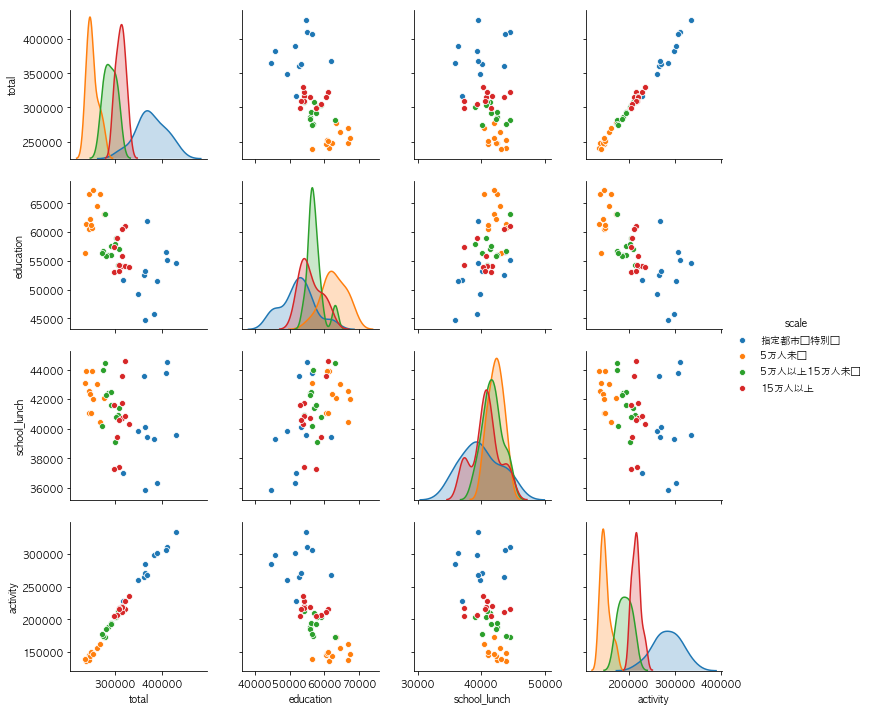

In [4]:
sns.pairplot(df_ps, hue="scale")

次に公立中学校の変数間の散布図を見ます。

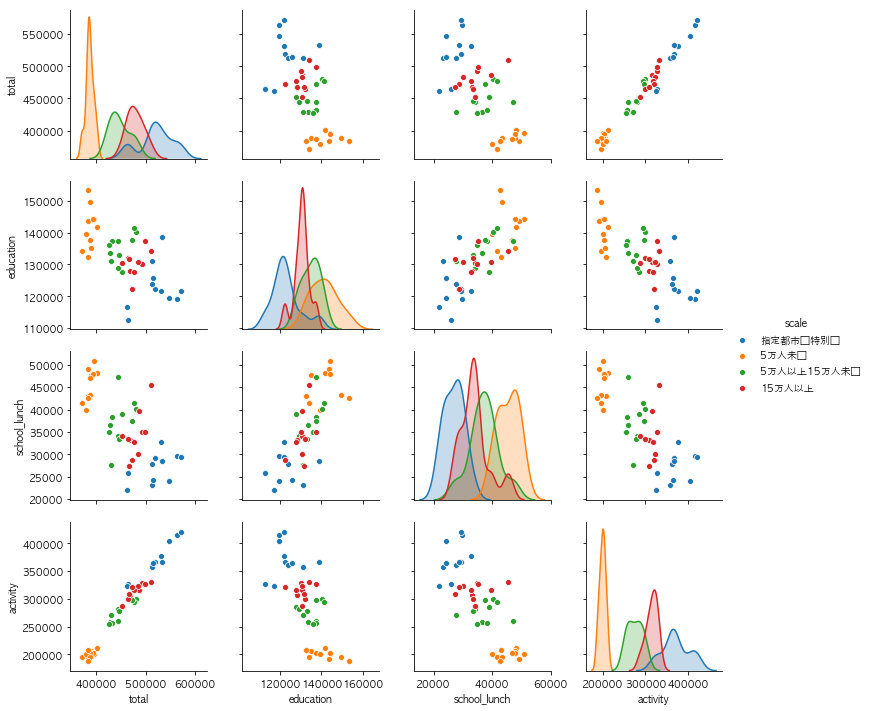

In [5]:
df_jhs = input_book.parse(input_sheet_name[1])
sns.pairplot(df_jhs, hue="scale")

地域規模の違いによる各種費用の違いをわかるやすくするため、５万人未満と指定都市・特別区でもプロットします。

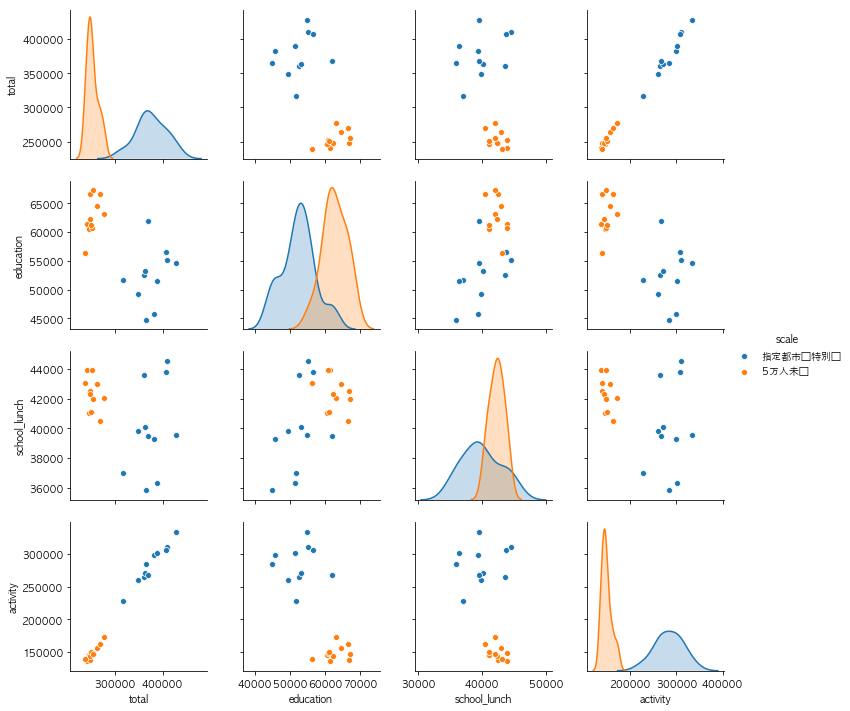

In [6]:
df_ps2= input_book.parse(input_sheet_name[2])
sns.pairplot(df_ps2, hue="scale") #公立小学

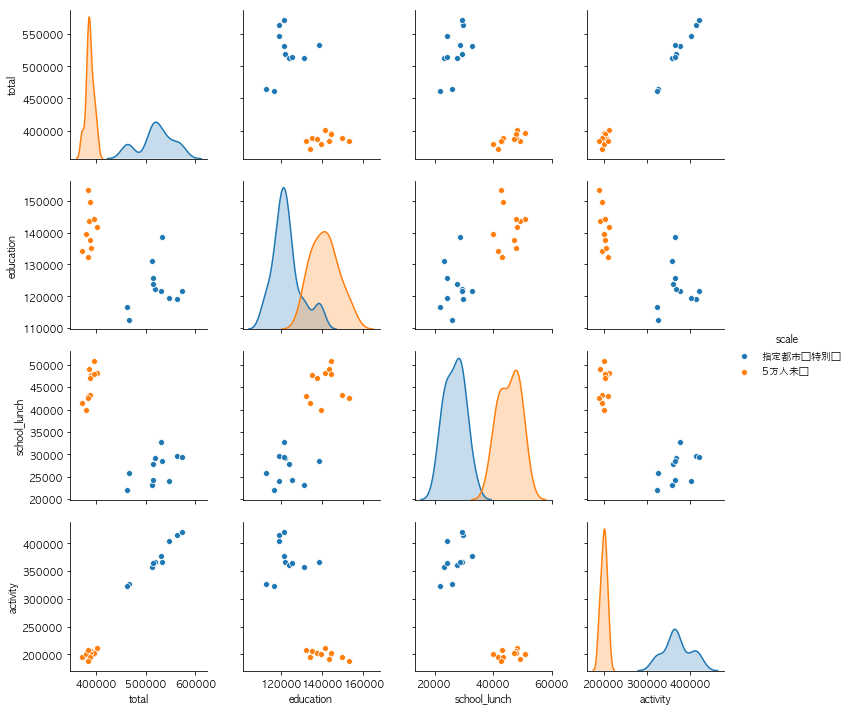

In [7]:
df_jhs2= input_book.parse(input_sheet_name[3])
sns.pairplot(df_jhs2, hue="scale") #公立中学

また、地域規模別の学習費総額の推移をグラフで見てみます。

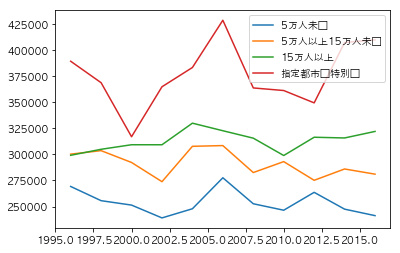

In [8]:
df_ps_timeseries=input_book.parse(input_sheet_name[4])
df_ps_timeseries.plot() #公立小学

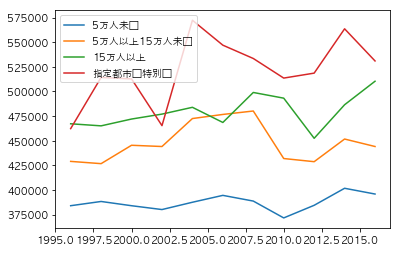

In [9]:
df_jhs_timeseries=input_book.parse(input_sheet_name[5])
df_jhs_timeseries.plot() #公立中学

地域規模別に学校外活動費の差が有意にあるのか検定します。(公立中学)<br>
今回は群が４つなので一元配置分散分析(対応なし)を用います。

In [15]:
df_jhs_activity=input_book.parse(input_sheet_name[11])
df_jhs_activity

,5万人未満,5万人以上15万人未満,15万人以上,指定都市・特別区
2016,200634,259485,330664,376571
2014,211942,284910,316041,414781
2012,191731,258661,287883,367120
2010,195854,256082,328058,361779
2008,205885,299660,326517,366198
2006,202315,293617,307261,403521
2004,202924,297332,322920,421082
2002,200690,280972,316727,326771
2000,208469,278932,320983,358316
1998,195418,255669,299456,364261


In [11]:
import scipy
under_five=df_ps_activity.loc[:,"5万人未満"]
five_to_fifteen=df_ps_activity.loc[:,"5万人以上15万人未満"]
over_fiteen=df_ps_activity.loc[:,"15万人以上"]
city=df_ps_activity.loc[:,"指定都市・特別区"]

scipy.stats.f_oneway(under_five, five_to_fifteen, over_fiteen,city)

F_onewayResult(statistic=149.59406611220746, pvalue=8.958824156437677e-22)

次に、目的変数を学校外活動費、説明変数を私立公立かどうか、収入にして重回帰分析を行います。取得できた範囲でのデータの性質上いずれもダミー変数なのであまり正確ではないかも

In [12]:
#小学校
import statsmodels.formula.api as smf

input_book2 = pd.ExcelFile('analysis.xlsx')
input_sheet_name2 = input_book2.sheet_names
ps_analysis_df=input_book2.parse(input_sheet_name2[2])

ps_activity=ps_analysis_df.loc[:,"学校外活動費"]
ps_school_type=ps_analysis_df.loc[:,"公立or私立"]
ps_income=ps_analysis_df.loc[:,"年収ランク"]



ps_analysis_df=pd.concat([ps_activity,ps_school_type,ps_income], axis=1)

ps_model = smf.ols(formula='ps_activity~ps_school_type+ps_income',data=ps_analysis_df)
ps_model.fit().summary()

/Users/yutopia/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            ps_activity   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     202.1
Date:                Mon, 27 May 2019   Prob (F-statistic):           3.33e-08
Time:                        23:11:25   Log-Likelihood:                -56.279
No. Observations:                  12   AIC:                             118.6
Df Residuals:                       9   BIC:                             120.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         18.3500     21.859      0.839      0.423     -31.099      67.799
ps_school_type   259.5000     17.558     14.780      0.000     219.782     299.218
ps_income         70.0429      5.140     13.626      0.000      58.414      81.671
==============================================================================
Omnibus:                        1.348   Durbin-Watson:                   1.778
Prob(Omnibus):                  0.510   Jarque-Bera (JB):                0.884
Skew:                           0.344   Prob(JB):                        0.643
Kurtosis:                       1.862   Cond. No.                         11.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
#中学校

input_book3 = pd.ExcelFile('analysis.xlsx')
input_sheet_name3 = input_book3.sheet_names
jhs_analysis_df=input_book3.parse(input_sheet_name3[3])

jhs_activity=jhs_analysis_df.loc[:,"学校外活動費"]
jhs_school_type=jhs_analysis_df.loc[:,"公立or私立"]
jhs_income=jhs_analysis_df.loc[:,"年収ランク"]



jhs_analysis_df=pd.concat([jhs_activity,jhs_school_type,jhs_income], axis=1)

jhs_model = smf.ols(formula='jhs_activity~jhs_school_type+jhs_income',data=jhs_analysis_df)
jhs_model.fit().summary()

/Users/yutopia/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           jhs_activity   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     31.98
Date:                Mon, 27 May 2019   Prob (F-statistic):           8.14e-05
Time:                        23:11:25   Log-Likelihood:                -57.127
No. Observations:                  12   AIC:                             120.3
Df Residuals:                       9   BIC:                             121.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         181.6667     23.461      7.743      0.000     128.595     234.739
jhs_school_type   -43.0000     18.844     -2.282      0.048     -85.629      -0.371
jhs_income         42.2857      5.517      7.665      0.000      29.805      54.766
==============================================================================
Omnibus:                        0.176   Durbin-Watson:                   1.856
Prob(Omnibus):                  0.916   Jarque-Bera (JB):                0.209
Skew:                           0.205   Prob(JB):                        0.901
Kurtosis:                       2.501   Cond. No.                         11.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
#高校

input_book４ = pd.ExcelFile('analysis.xlsx')
input_sheet_name４ = input_book４.sheet_names
hs_analysis_df=input_book４.parse(input_sheet_name４[4])

hs_activity=hs_analysis_df.loc[:,"学校外活動費"]
hs_school_type=hs_analysis_df.loc[:,"公立or私立"]
hs_income=hs_analysis_df.loc[:,"年収ランク"]



hs_analysis_df=pd.concat([hs_activity,hs_school_type,hs_income], axis=1)

hs_model = smf.ols(formula='hs_activity~hs_school_type+hs_income',data=hs_analysis_df)
hs_model.fit().summary()

/Users/yutopia/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            hs_activity   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     60.90
Date:                Mon, 27 May 2019   Prob (F-statistic):           5.88e-06
Time:                        23:11:25   Log-Likelihood:                -56.930
No. Observations:                  12   AIC:                             119.9
Df Residuals:                       9   BIC:                             121.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         15.4667     23.079      0.670      0.520     -36.742      67.675
hs_school_type    60.6667     18.538      3.273      0.010      18.732     102.601
hs_income         57.2000      5.427     10.539      0.000      44.923      69.477
==============================================================================
Omnibus:                        0.835   Durbin-Watson:                   2.744
Prob(Omnibus):                  0.659   Jarque-Bera (JB):                0.446
Skew:                          -0.442   Prob(JB):                        0.800
Kurtosis:                       2.668   Cond. No.                         11.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""